# Heat Transfer Post Process:

## Packages:

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

## Simulation Data:

In [3]:
#Import Series Data
Results_Ideal=[]
Results_ML=[]
T_ref = np.array([10,20,30,40,50])

for T in T_ref:
    Results_Ideal.append(np.genfromtxt('Stick_Ideal/Results/T_ref_'+str(T)+'.xy'))
    Results_ML.append(np.genfromtxt('Stick_ML/Results/T_ref_'+str(T)+'.xy'))

## Plot Results

<IPython.core.display.Javascript object>


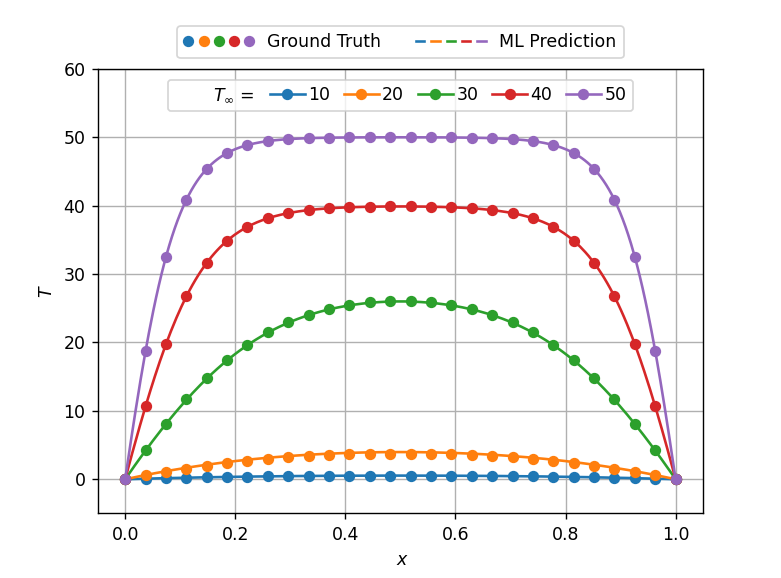

In [5]:
import matplotlib.legend_handler

fig, ax=plt.subplots(figsize = (5,3.7))
l_T = []
l_Ideal = []
l_ML = []

l_T.append(ax.plot([], [], ' ')[0])


for i in range(5):
    l_T.append(ax.plot([], [],linestyle = '-',color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=37)[0])
    l_Ideal.append(ax.plot(Results_Ideal[i][:,0],Results_Ideal[i][:,1],linestyle = '', color='C'+str(i),marker='o', markeredgecolor='C'+str(i),markerfacecolor='C'+str(i), markersize=5.5,markevery=37)[0])
    l_ML.append(ax.plot(Results_ML[i][:,0],Results_ML[i][:,1],linestyle = '-', color='C'+str(i))[0])


ax.grid()
ax.set_ylabel(r"${T}$")
ax.set_xlabel(r" ${x}$")
ax.set_ylim(top=60, bottom=-5)

legend1=ax.legend(handles=l_T,
           labels=[r"${T}_\infty$ = ",'10','20','30','40','50'],
           ncol=6,
           borderaxespad=0.01,
           handletextpad=0.2,
           columnspacing=0.8,
           loc='center',bbox_to_anchor=(0.5,0.94))

handles = [(l_Ideal[0],l_Ideal[1],l_Ideal[2],l_Ideal[3],l_Ideal[4]), (l_ML[0],l_ML[1],l_ML[2],l_ML[3],l_ML[4])]
labels = ['Ground Truth','ML Prediction']

legend2=ax.legend(handles=handles,labels=labels,ncol=2,loc='center',
                  bbox_to_anchor=(0.5,1.06),
                  handlelength = 4,
                  handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)})

plt.gca().add_artist(legend1)
